In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import r2_score, classification_report as cr, confusion_matrix as cm
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
z = pd.read_csv(r"C:\Users\skj_h\OneDrive\Desktop\dataset\Social_Network_Ads.csv")
z

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
z.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
z.shape

(400, 3)

In [5]:
z.size

1200

In [6]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
z.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [8]:
z.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<Axes: xlabel='Age', ylabel='Purchased'>

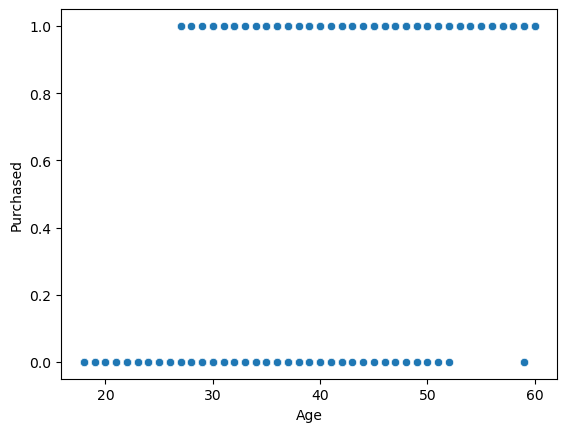

In [9]:
sns.scatterplot(x = z["Age"], y = z["Purchased"], data = z)

<Axes: xlabel='Age', ylabel='Purchased'>

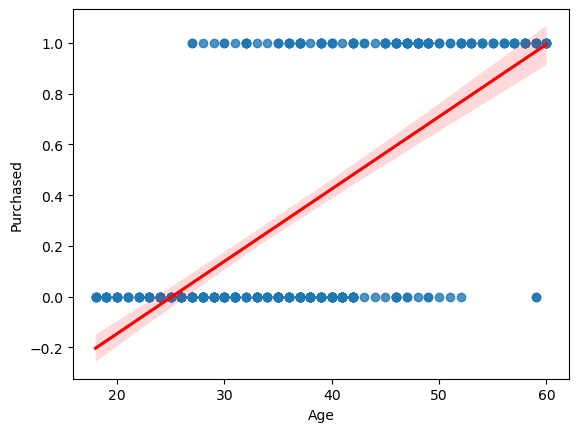

In [10]:
sns.regplot(x = z["Age"], y = z["Purchased"], data = z, line_kws = {"color": "red"})

In [11]:
x = z[["Age", "Purchased"]]

In [12]:
X = x
Y = x["Purchased"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
x_train = x_train.drop(["Purchased"], axis = 1)
x_test = x_test.drop(["Purchased"], axis = 1)

In [15]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [16]:
n = LogisticRegression()
n.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_predict_train = n.predict(x_train)

In [18]:
y_predict_test = n.predict(x_test)

In [19]:
cr_train_logistic = cr(y_true = y_train, y_pred = y_predict_train)

In [20]:
cr_test_logistic = cr(y_true = y_test, y_pred = y_predict_test)

In [21]:
a = dtc()
a.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
y_predict_train1 = a.predict(x_train)
cr_train_decision = cr(y_true = y_train, y_pred = y_predict_train)

In [23]:
y_predict_test1 = a.predict(x_test)
cr_test_decision  = cr(y_true = y_test, y_pred = y_predict_test1)


In [24]:
y5 = rfc()
y5.fit(x_train, y_train)

RandomForestClassifier()

In [25]:
y_predict_train2 = y5.predict(x_train)
cr_train_random = cr(y_true = y_train, y_pred = y_predict_train2)

In [26]:
y_predict_test2 = y5.predict(x_test)
cr_test_random = cr(y_true = y_test, y_pred = y_predict_test2)

In [27]:
def upper_name(s):
    return(s.upper())

In [28]:
print(upper_name("Logistic Regression training"),cr_train_logistic)
print(upper_name("Decision  Tree classifier training"),cr_train_decision)
print(upper_name("Random forest classifier training"),cr_train_random)
print(upper_name("Logistic Regression testing"),cr_test_logistic) 
print(upper_name("Decision Tree classifier testing"),cr_test_decision) 
print(upper_name("Random forest classifier testing"),cr_test_random)

LOGISTIC REGRESSION TRAINING               precision    recall  f1-score   support

           0       0.84      0.92      0.88       182
           1       0.81      0.67      0.74        98

    accuracy                           0.83       280
   macro avg       0.83      0.80      0.81       280
weighted avg       0.83      0.83      0.83       280

DECISION  TREE CLASSIFIER TRAINING               precision    recall  f1-score   support

           0       0.84      0.92      0.88       182
           1       0.81      0.67      0.74        98

    accuracy                           0.83       280
   macro avg       0.83      0.80      0.81       280
weighted avg       0.83      0.83      0.83       280

RANDOM FOREST CLASSIFIER TRAINING               precision    recall  f1-score   support

           0       0.88      0.88      0.88       182
           1       0.78      0.77      0.77        98

    accuracy                           0.84       280
   macro avg       0.83      0